In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999


UsageError: Line magic function `%%javascript` not found.


In [2]:
import os
import numpy as np
from PIL import Image
import cv2
import pyocr
import pyocr.builders
import matplotlib.pyplot as plt



tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("No OCR tool found")
    sys.exit(1)
# # The tools are returned in the recommended order of usage
tool = tools[0]
print("Will use tool '%s'" % (tool.get_name()))
# # Ex: Will use tool 'libtesseract'
#
langs = tool.get_available_languages()
print("Available languages: %s" % ", ".join(langs))
lang = langs[0]+ '+'+langs[1]
print("Will use lang '%s'" % (lang))

Will use tool 'Tesseract (sh)'
Available languages: eng, fra
Will use lang 'eng+fra'


In [3]:
receipts_images = os.listdir("receipts_images/")
receipts_images.sort()
receipt_path = "receipts_images/"+receipts_images[0]
image = cv2.imread(receipt_path,0)

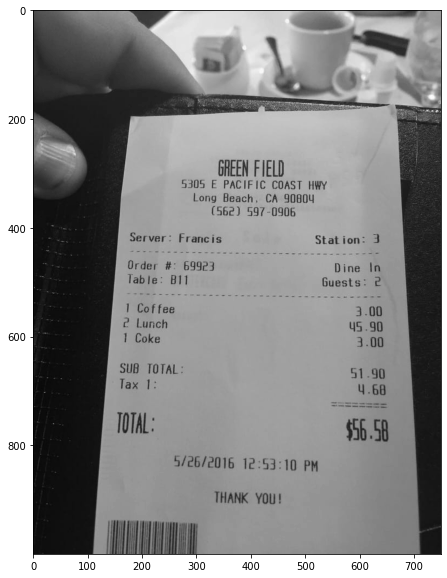

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(image,'gray')

In [5]:
bbox_text = tool.image_to_string(Image.fromarray(image),lang=lang,builder=pyocr.builders.TextBuilder())

In [6]:
bbox_text.replace("\n","       ")

'GREEN FIELD              5305 E PACIFIC COAST HWY       Long Beach, CA 90804       (562) 597-0906              Server: Francis Station: 3       Order #: 69923 Dine In       lable: B11 Guests: 2       1 Coffee 3.00       2 Lunch 45.90       1 Coke 3.00       SUB TOTAL: 51.90       Tax 1:              TOTAL: $56.50              5/26/2016 12:53:10 PM              En              THANK YOU !'